<h1>Kernel Smoothing</h1>

```MROZ.DES

inlf      hours     kidslt6   kidsge6   age       educ      wage      repwage  
hushrs    husage    huseduc   huswage   faminc    mtr       motheduc  
fatheduc  unem      city      exper     nwifeinc  lwage     expersq   

  Obs:   753

  1. inlf                     =1 if in labor force, 1975
  2. hours                    hours worked, 1975
  3. kidslt6                  # kids < 6 years
  4. kidsge6                  # kids 6-18
  5. age                      woman's age in yrs
  6. educ                     years of schooling
  7. wage                     estimated wage from earns., hours
  8. repwage                  reported wage at interview in 1976
  9. hushrs                   hours worked by husband, 1975
 10. husage                   husband's age
 11. huseduc                  husband's years of schooling
 12. huswage                  husband's hourly wage, 1975
 13. faminc                   family income, 1975
 14. mtr                      fed. marginal tax rate facing woman
 15. motheduc                 mother's years of schooling
 16. fatheduc                 father's years of schooling
 17. unem                     unem. rate in county of resid.
 18. city                     =1 if live in SMSA
 19. exper                    actual labor mkt exper
 20. nwifeinc                 (faminc - wage*hours)/1000
 21. lwage                    log(wage)
 22. expersq                  exper^2
```

In [1]:
import pandas as pd
import wooldridge as woo
mroz = woo.dataWoo('mroz').copy()

<h2>Density Estimation: Univariate</h2>

Text(0.5, 1.0, 'kids < 6')

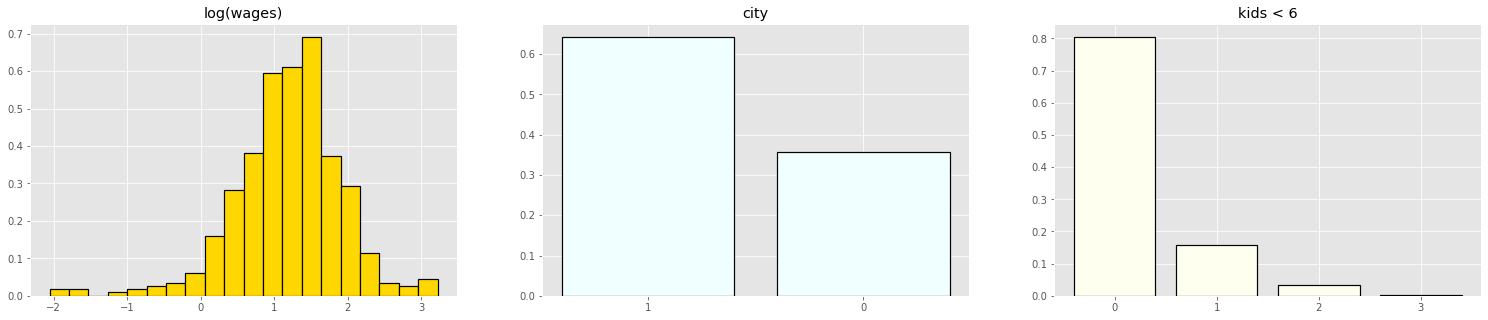

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, axs = plt.subplots(1,3,figsize=(26,5))
axs[0].hist(mroz.lwage,color='gold',edgecolor='black',linewidth=1.2,bins=20,density=True)
axs[0].set_title('log(wages)')
axs[1].bar(["1","0"],mroz.city.value_counts()/mroz.shape[0],color='azure',edgecolor='black',linewidth=1.2)
axs[1].set_title('city')
axs[2].bar(["0","1","2","3"],mroz.kidslt6.value_counts()/mroz.shape[0],color='ivory',edgecolor='black',linewidth=1.2)
axs[2].set_title('kids < 6')


🔗 You can find all available `matplotlib` styles [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Recall that for <ins>any</ins> random variable, $X$, the __cumulative distribution function__ (CDF) is defined as
$$
F(x)=\Pr\{X\le x\},
$$
and based on a random sample $\{X_i;i=1,\ldots,n\}$ the __empirical distribution function__ (EDF) is defined as
$$
\widehat{F}(x)=\frac{1}{n} \sum_{i=1}^{n} \mathbb{I}\left(X_{i} \leq x\right)
$$

<h3>Continuous</h3>

In this case, the __probability density function__ (pdf) is defined as
$$
f(x)=\frac{d}{d x} F(x)=\lim _{h \rightarrow 0} \frac{F(x+h)-F(x-h)}{2 h}\text{.}
$$
Therefore, a natural estimator will be
$$
\begin{aligned}
\widehat{f}(x) &=\frac{\widehat{F}(x+h)-\widehat{F}(x-h)}{2 h} \\
&=\frac{1}{2 h}\left\{\frac{1}{n} \sum_{i=1}^{n} \mathbb{I}\left(X_{i} \leq x+h\right)-\frac{1}{n} \sum_{i=1}^{n} \mathbb{I}\left(X_{i} \leq x-h\right)\right\} \\
&=\frac{1}{n h} \sum_{i=1}^{n} \frac{1}{2} \mathbb{I}\left(x-h \leq X_{i} \leq x+h\right) \\
&=\frac{1}{n h} \sum_{i=1}^{n} \frac{1}{2} \mathbb{I}\left(-1 \leq \frac{X_{i}-x}{h} \leq 1\right)=\frac{1}{n h} \sum_{i=1}^{n} \frac{1}{2} \mathbb{I}\left(\left|\frac{X_{i}-x}{h}\right| \leq 1\right) \\
&=\frac{1}{n h} \sum_{i=1}^{n} k\left(\frac{X_{i}-x}{h}\right), \text { where } k(u)=\frac{1}{2} \mathbb{I}(|u| \leq 1)
\end{aligned}
$$

📝 The $k(\cdot)$ function is known as the __kernel__ function and the hyperparameter $h$ is known as the __bandwidth__.

📝 Notice that as $n\rightarrow\infty$ we have that $\widehat{f}(x)=0$ for _all_ values of $x$.

💻 The following code estimates the density of `lwage` at 20 evaluation points, $\{-2.054,-1.776,\ldots,2.941,3.219\}$, i.e., $\widehat{f}(-2.054), \widehat{f}(-1.776),\ldots,\widehat{f}(2.941),\widehat{f}(3.219)$ using $h=0.537$.

In [3]:
import numpy as np
x = np.linspace(mroz.lwage.min(),mroz.lwage.max(),20)

from statsmodels.nonparametric.kde import KDEUnivariate as kde
dens = kde(mroz[mroz.lwage.notna()].lwage)
dens.fit(kernel='gau',bw=0.537)
dens.evaluate(x)

array([0.00678222, 0.00905798, 0.01172368, 0.01629054, 0.02516849,
       0.04204782, 0.0726463 , 0.12371659, 0.19892541, 0.29320568,
       0.3894695 , 0.46159752, 0.48484841, 0.44928738, 0.3667389 ,
       0.26442783, 0.16992947, 0.09923083, 0.05442163, 0.02898062])

📝 The following code shows the effect the hyperparameter (bandwidth) $h$ has on the estimates.

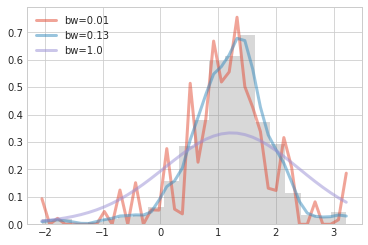

In [4]:
x = np.linspace(mroz.lwage.min(),mroz.lwage.max(),40)

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
for bandwidth in [0.01, 0.13, 1.0]:
    ax.plot(x, kde(mroz[mroz.lwage.notna()].lwage).fit(kernel='gau',bw=bandwidth).evaluate(x),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(mroz[mroz.lwage.notna()].lwage, bins=20, fc='gray', histtype='stepfilled', alpha=0.3,density=True)
ax.legend(loc='upper left')

<h3>Discrete</h3>

Recall that if the random variable, $X$, can take on a finite number of values in $\mathcal{S}=\{0,1,2, \ldots, c-1\}$, then its __probability function__ is defined as

$$
p(s)=\operatorname{Pr}(X=s)=\operatorname{Pr}(X \leq s)-\operatorname{Pr}(X \leq s-1)=F(s)-F(s-1)\text{,}
$$

and a natural estimator will be

$$
\begin{aligned}
\widehat{p}(s) &=\frac{1}{n} \sum_{i=1}^{n} \mathbb{I}\left(X_{i} \leq s\right)-\frac{1}{n} \sum_{i=1}^{n} \mathbb{I}\left(X_{i} \leq s-1\right) \\
&=\frac{1}{n} \sum_{i=1}^{n}\left\{\mathbb{I}\left(X_{i} \leq s\right)-\mathbb{I}\left(X_{i} \leq s-1\right)\right\} \\
&=\frac{1}{n} \sum_{i=1}^{n} \mathbb{I}\left(s-1<X_{i} \leq s\right) \\
&=\frac{1}{n} \sum_{i=1}^{n} \mathbb{I}\left(X_{i}=s\right)=\frac{1}{n} \sum_{i=1}^{n} 1^{\mathbb{I}\left(X_{i}=s\right)} \times 0^{1-\mathbb{I}\left(X_{i}=s\right)}
\end{aligned}
$$

<h4>Unordered</h4>

$$
\widehat{p}(s)=\frac{1}{n} \sum_{i=1}^{n}[1-\lambda]^{\mathbb{I}\left(X_{i}=s\right)} \times[\lambda /(c-1)]^{1-\mathbb{I}\left(X_{i}=s\right)}=\frac{1}{n} \sum_{i=1}^{n}l(X_i,s;\lambda)
$$

📝 The hyperparameter $\lambda\in\left[0,(c-1)/c\right]$ is known as the __bandwidth__.

   1. If $\lambda=0$ we have $\widehat{p}(s)=n^{-1} \sum_{i=1}^{n} \mathbb{I}\left(X_{i}=s\right)$.
   2. If $\lambda=(c-1)/c$, then $\widehat{p}(s)=(nc)^{-1}$.

💻 The following code estimates the probability function of `city` at 1 and 0, i.e., $\widehat{p}(1)$ and $\widehat{p}(0)$ using $\lambda=0.1$.

In [5]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate as KDE
x = np.array([1,0])
dens_u = KDE(data=mroz.city,var_type='u',bw=np.array([0.1]))
dens_u.pdf(x)

array([0.61420983, 0.38579017])

<h4>Ordered</h4>

$$
\widehat{p}(s)=\frac{1}{n} \sum_{i=1}^{n}\lambda^{|s-X_i|}=\frac{1}{n} \sum_{i=1}^{n}l(X_i,s;\lambda)
$$

📝 The hyperparameter $\lambda$ is known as the bandwidth and is such that $\lambda\in\left[0,1\right]$.

💻 The following code estimates the probability function of `kidslt6` at 0, 1, 2, and 3, i.e., $\widehat{p}(0)$, $\widehat{p}(1)$, $\widehat{p}(2)$, and $\widehat{p}(3)$ with a bandwidth $\lambda=0.15$.

In [6]:
x = np.array([0,1,2,3])
dens_u = KDE(data=mroz.kidslt6,var_type='o',bw=np.array([0.15]))
dens_u.pdf(x)

array([0.69438968, 0.1867446 , 0.04728901, 0.00824051])

<h2>Density Estimation: Multivariate ($q$ Continuous & $r$ Discrete)</h2>

Suppose that

$$
\begin{array}{l}
X_{i}^{\mathrm{c}}=\left(X_{i ; 1}^{\mathrm{c}}, \ldots, X_{i ; q}^{\mathrm{c}}\right)^{\top}, x^{\mathrm{c}}=\left(x_{1}^{\mathrm{c}}, \ldots, x_{q}^{\mathrm{c}}\right)^{\top} \\
X_{i}^{\mathrm{d}}=\left(X_{i ; 1}^{\mathrm{d}}, \ldots, X_{i, r}^{\mathrm{d}}\right)^{\top}, x^{\mathrm{d}}=\left(x_{1}^{\mathrm{d}}, \ldots, x_{r}^{\mathrm{d}}\right)^{\top},
\end{array}
$$

then the kernel density estimator is

$$
\widehat{f}\left(x^{\mathrm{c}}, x^{\mathrm{d}}\right)=\frac{1}{n h_{1} \times \ldots \times h_{q}} \sum_{i=1}^{n} \prod_{j=1}^{q} k\left(X_{i ; j}^{\mathrm{c}}, x_{j}^{\mathrm{c}} ; h_{j}\right) \prod_{s=1}^{r} l\left(X_{i ; s}^{\mathrm{d}}, x_{s}^{\mathrm{d}} ; \lambda_{s}\right)
$$

💻 Let $X^{\text{c}}=$ `lwage`, and $X^{\text{d}}=($ `city` , `kidslt6` $)$, then the following code estimates $\widehat{f}$ when $x^{\text{c}}=1.5$ and $X^{\text{d}}=(1,2)$ using bandwidths $(h,\lambda_1,\lambda_2)$ equal to a [rule-of-thumb bandwidth](https://en.wikipedia.org/wiki/Kernel_density_estimation).

In [7]:
x = np.array([1.5,1,2]) # lwage=1.5, city=1, kidslt6=2
dens_u = KDE(data=mroz[mroz.lwage.notna()][['lwage','city','kidslt6']],var_type='cuo',bw='normal_reference')
print(dens_u.pdf(x))
print(dens_u.bw)

0.008341831194146332
[0.32220664 0.21408054 0.17461367]


<h2>Regression Estimation</h2>

Suppose we have a sample, $\left(Y_{1}, X_{1}^{\mathrm{c}}, X_{1}^{\mathrm{d}}\right), \ldots,\left(Y_{n}, X_{n}^{\mathrm{c}}, X_{n}^{\mathrm{d}}\right)$
and define $E[Y \mid X=x]=m(x)$ then we are interested in estimating $m(\cdot)$ at the evaluation point $x=\left(x^{\mathrm{c}}, x^{\mathrm{d}}\right)$.

In [8]:
tmp = ["kidslt6", "kidsge6", "city", "age", "educ","exper", "hushrs", "husage", "huseduc","huswage","nwifeinc","mtr","unem"]
X = mroz[tmp]
y = mroz["inlf"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

 There are two possibilities:

<h3>Local Constant</h3>

An estimator, $\widehat{m}(\cdot)$, at the evaluation point $x=(x^{\text{c}},x^{\text{d}})$ can be found as the solution of the following minimization problem

$$
\min _{a \in \mathbb{R}} \sum_{i=1}^{n}\left\{Y_{i}-a\right\}^{2} \prod_{j=1}^{q_{x}} k\left(X_{i ; j}^{\mathrm{c}}, x_{j}^{\mathrm{c}} ; h_{j}\right) \prod_{s=1}^{r_{x}} l\left(X_{i ; s}^{\mathrm{d}}, x_{s}^{\mathrm{d}} ; \lambda_{s}\right)
$$

📝 It can be shown that $\widehat{a}\left(x\right) \rightarrow m\left(x\right)$ as $n \rightarrow \infty$.

In [10]:
# This code creates a set of bandwidths that use a rule-of-thumb
dens_u = KDE(data=X_train,var_type='ooucccccccccc',bw='normal_reference')
bandwidth=dens_u.bw

In [11]:
# This code fits a local constant nonparametric regression with rule-of-thumb bandwidths
from statsmodels.nonparametric.kernel_regression import KernelReg as KREG
reg_lc = KREG(endog=y_train,exog=X_train,reg_type='lc',var_type = 'ooucccccccccc',bw=bandwidth)

A useful statistic is defined as the $R^2$

$$
R^{2}:=\frac{\left(\sum_{i=1}^{n}\left(Y_{i}-\bar{Y}\right)\left(\hat{Y}_{i}-\bar{Y}\right)\right)^{2}}{\left(\sum_{i=1}^{n}\left(Y_{i}-\bar{Y}\right)^{2}\right)\left(\sum_{i=1}^{n}\left(\hat{Y}_{i}-\bar{Y}\right)^{2}\right)}
$$

and is neither the squared correlation coefficient between $Y_{1}, \ldots, Y_{n}$ and $\hat{Y}_{1}, \ldots, \hat{Y}_{n}$ nor "the percentage of variance explained" by the model - this interpretation makes sense within the linear model context only. It is however a quantity in $[0,1]$ that attains $R^{2}=1$ whenever the fit is perfect (zero variability about the curve), so it can give us an idea of how informative the estimated regression function is.

In [12]:
print(reg_lc.r_squared())

0.915769659673548


💻 The following code _fit_ the nonparametric regression at each data point in the validation set and return these estimates (`ahat`) as well as estimates of the derivative of this regression evaluated at each data point in the test set (`bhat`).

In [13]:
ahat, bhat =reg_lc.fit(X_test)

💻 We now evaluate the percentage of correct predictions in the validation set.

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ahat>=0.5)

0.7152317880794702

<h4>Hyperparameter Optimal Choice</h4>

One can choose $h_{1}, \ldots, h_{q_{x}}, \lambda_{1}, \ldots, \lambda_{r_{x}}$ that numerically minimize
$$
\sum_{i=1}^{n}\left[Y_{i}-\widehat{m}_{-i}\left(X_{i}\right)\right]^{2} M\left(X_{i}\right)
$$
where $\hat{m}_{-i}$ is the local constant estimator evaluated at the $i$ observation but utilizing the $n-1$ data points _excluding_ observation $i$ and $M(\cdot)$ is a weighting function. This method is called the __least squares cross-validation__ and it is very computationally intensive.

💻 The following code implements it and then saves the relevant regression object in a _pickle_ for later use, see, e.g., [pickle](https://pythonprogramming.net/python-pickle-module-save-objects-serialization/).

````Python
import time
import statsmodels as sm
tic = time.time()
reg_lc_cv_ls = sm.nonparametric.kernel_regression.KernelReg(endog=y_train,exog=X_train,\
                  reg_type='lc',var_type = 'ooucccccccccc',bw='cv_ls')
toc = time.time()
print("Total elapsed time:", (toc-tic)/60, "minutes.")

import pickle 
file_reg_lc_cv_ls = open('reg_lc_cv_ls.obj', 'wb') 
pickle.dump(reg_lc_cv_ls,file_reg_lc_cv_ls)
file_reg_lc_cv_ls.close()
````

💻 The regression object `reg_lc_cv_ls` was saved in an object called `reg_lc_cv_ls.obj` and the following code loads the content of this object and it is ready for use.

In [15]:
import pickle
file_reg_lc_cv_ls = open('reg_lc_cv_ls.obj','rb')
reg_lc_cv_ls = pickle.load(file_reg_lc_cv_ls)
file_reg_lc_cv_ls.close()
print(reg_lc_cv_ls.bw)

[2.21528886e-01 9.11053923e-01 2.55770506e-01 7.75830938e+00
 2.00695757e+00 1.92464421e+00 8.48526583e+02 9.81284212e+00
 3.16443451e+00 1.99708238e+00 2.94536172e+00 2.17423071e-02
 4.91124011e+00]


💻 We now evaluate the proportion of correct predictions in the validation set using the optimal hyperparameters for the training set.

In [16]:
ahat, bhat =reg_lc_cv_ls.fit(X_test)
accuracy_score(y_test, ahat>=0.5)

0.6688741721854304

<h3>Local Linear</h3>

Another estimator, $\widehat{m}(\cdot)$, at the evaluation point $x=(x^{\text{c}},x^{\text{d}})$ can also be found as the solution of the following minimization problem

$$
\min _{a, b \in \mathbb{R}^{2}} \sum_{i=1}^{n}\left\{Y_{i}-a-\left(X_{i}^{\mathrm{c}}-x^{\mathrm{c}}\right)^{\top} b\right\}^{2} \prod_{j=1}^{q_{x}} k\left(X_{i ; j}^{\mathrm{c}}, x_{j}^{\mathrm{c}} ; h_{j}\right) \prod_{S=1}^{r_{x}} l\left(X_{i ; s}^{\mathrm{d}}, x_{s}^{\mathrm{d}} ; \lambda_{s}\right)
$$

📝 It can be shown that $\widehat{a}\left(x\right) \rightarrow m\left(x\right)$ and $\hat{b}\left(x^{c}\right) \rightarrow \partial m\left(x^{c}\right) / \partial x^{c}$
as $n \rightarrow \infty$.

In [17]:
reg_ll = KREG(endog=y_train,exog=X_train,reg_type='ll',var_type = 'ooucccccccccc',bw=dens_u.bw)

💻 This code will fit the _local linear_ estimator at each observation in the validation set and print the proportion of correct predictions using the _rule-of-thumb_ hyperparameters.

In [18]:
ahat, bhat =reg_ll.fit(X_test)
accuracy_score(y_test, ahat>=0.5)

0.7086092715231788

<h4>Hyperparameter Optimal Choice</h4>

One can choose $h_{1}, \ldots, h_{q_{x}}, \lambda_{1}, \ldots, \lambda_{r_{x}}$ that numerically minimize
$$
\sum_{i=1}^{n}\left[Y_{i}-\widehat{m}_{-i}\left(X_{i}\right)\right]^{2} M\left(X_{i}\right)
$$
where $\hat{m}_{-i}$ is the local constant estimator evaluated at the $i$ observation but utilizing the $n-1$ data points _excluding_ observation $i$ and $M(\cdot)$ is a weighting function. This method is called the __least squares cross-validation__ and it is very computationally intensive.

💻 The following code implements it and then saves the relevant regression object in a _pickle_ for later use, see, e.g., [pickle](https://pythonprogramming.net/python-pickle-module-save-objects-serialization/).

````Python
import time
import statsmodels as sm
tic = time.time()
reg_ll_cv_ls = sm.nonparametric.kernel_regression.KernelReg(endog=y_train,exog=X_train,\
                  reg_type='ll',var_type = 'ooucccccccccc',bw='cv_ls')
toc = time.time()
print("Total elapsed time:", (toc-tic)/60, "minutes.")

import pickle 
file_reg_ll_cv_ls = open('reg_ll_cv_ls.obj', 'wb') 
pickle.dump(reg_ll_cv_ls, file_reg_ll_cv_ls)
file_reg_ll_cv_ls.close()
````

💻 The regression object `reg_ll_cv_ls` was saved in an object called `reg_ll_cv_ls.obj` and the following code loads the content of this object and it is ready for use.

In [19]:
import pickle
file_reg_ll_cv_ls = open('reg_ll_cv_ls.obj','rb')
reg_ll_cv_ls = pickle.load(file_reg_ll_cv_ls)
file_reg_ll_cv_ls.close()
reg_ll_cv_ls.bw

array([2.62619568e-01, 6.01155989e-01, 2.78085941e-01, 1.22518113e+01,
       1.97381503e+00, 7.61494871e+00, 6.07980047e+02, 5.36972115e+00,
       1.57022270e+00, 3.74868297e+00, 9.93040541e+00, 4.47336779e-02,
       2.81342404e+00])

💻 The following code _fit_ the nonparametric regression at each data point in the validation set and return these estimates (`ahat`) as well as estimates of the derivative of this regression evaluated at each data point in the test set (`bhat`).

In [20]:
ahat, bhat =reg_ll_cv_ls.fit(X_test)

💻 We now evaluate the proportion of correct predictions in the validation set using the optimal hyperparameters for the training set.

In [21]:
accuracy_score(y_test, ahat>=0.5)

0.6887417218543046

<u>Summary of Hyperparameters</u>

In [22]:
import numpy as np
bw = pd.DataFrame(np.array([tmp,bandwidth.round(4),reg_lc_cv_ls.bw.round(4),reg_ll_cv_ls.bw.round(4)]).T)
bw.columns =['var', 'rot', 'lc_cv_ls', 'll_cv_ls']
bw.set_index('var')

,rot,lc_cv_ls,ll_cv_ls
var,,,
kidslt6,0.3767,0.2215,0.2626
kidsge6,0.9487,0.9111,0.6012
city,0.3463,0.2558,0.2781
age,5.7315,7.7583,12.2518
educ,1.6302,2.007,1.9738
exper,5.6804,1.9246,7.6149
hushrs,423.7113,848.5266,607.98
husage,5.7678,9.8128,5.3697
huseduc,2.1803,3.1644,1.5702


<h2>Pros & Cons</h2>

<h3>Pros</h3>

1. One only needs to provide the set of $k$ features and outcome variable for training. We do not need to provide a _correct_ parametric specification.
2. We only need to specify the _nature_ of the features and hyperparameters can be calculated optimally using the training set.
3. It has been shown that:
    1. If a continuous feature is _irrelevant_ in explaining $Y$, then its optimal bandwidth selected by _least squares cross-validation_ $h_j\rightarrow\infty$ as $n\rightarrow\infty$.
    2. If an unordered discrete feature is _irrelevant_ in explaining $Y$, then its optimal bandwidth selected by _least squares cross-validation_ $\lambda_j\rightarrow(c-1)/c$ as $n\rightarrow\infty$.
    Therefore, hyperparameter selection via least squares cross-validation performs _model selection_.

<h3>Cons</h3>

1. _Least squares cross-validation_ is computationally very intensive and depending on the number of features it can become prohibitive.
2. It requires that $E[Y \mid X=x]=m(x)$ is a smooth function with respect to $x^{\text{c}}$.